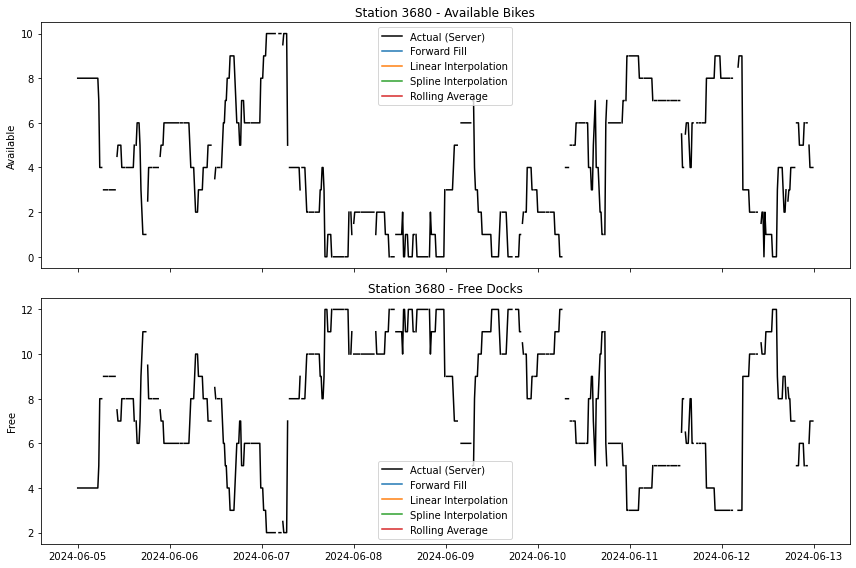

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- LOAD BOTH DATASETS ---
df_local = pd.read_csv("./data/data (1).csv")
df_server = pd.read_csv("./data/data.1.csv")

# --- CONVERT TIMESTAMP & FILTER STATION 3680 ---
for df in [df_local, df_server]:
    df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")
    df.set_index("datetime", inplace=True)
    df.sort_index(inplace=True)

station_id = 3680
df_local = df_local[df_local["id"] == station_id][["available", "free"]]
df_server = df_server[df_server["id"] == station_id][["available", "free"]]

# --- RESAMPLE TO 15-MIN INTERVALS ---
df_local_resampled = df_local.resample("15T").asfreq()
df_server_resampled = df_server.resample("15T").mean()

# --- SELECT A PLOT RANGE WITH ACTIVITY ---
plot_start = "2024-06-05"
plot_end = "2024-06-12"

df_local_plot = df_local_resampled[plot_start:plot_end]
df_server_plot = df_server_resampled[plot_start:plot_end]

# --- INTERPOLATION METHODS ---
interpolated_versions = {
    "Forward Fill": df_local_plot.fillna(method="ffill"),
    "Linear Interpolation": df_local_plot.interpolate(method="linear"),
    "Spline Interpolation": df_local_plot.interpolate(method="spline", order=2),
    "Rolling Average": df_local_plot.fillna(method="ffill").rolling(window=4, min_periods=1).mean()
}

# Align with server data for fair plotting
for method in interpolated_versions:
    interpolated_versions[method] = interpolated_versions[method].reindex(df_server_plot.index)

# --- PLOTTING ---
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Available Bikes
axs[0].plot(df_server_plot.index, df_server_plot["available"], color='black', label='Actual (Server)')
for method, df_interp in interpolated_versions.items():
    axs[0].plot(df_interp.index, df_interp["available"], label=method)
axs[0].set_title("Station 3680 - Available Bikes")
axs[0].set_ylabel("Available")
axs[0].legend()

# Free Docks
axs[1].plot(df_server_plot.index, df_server_plot["free"], color='black', label='Actual (Server)')
for method, df_interp in interpolated_versions.items():
    axs[1].plot(df_interp.index, df_interp["free"], label=method)
axs[1].set_title("Station 3680 - Free Docks")
axs[1].set_ylabel("Free")
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

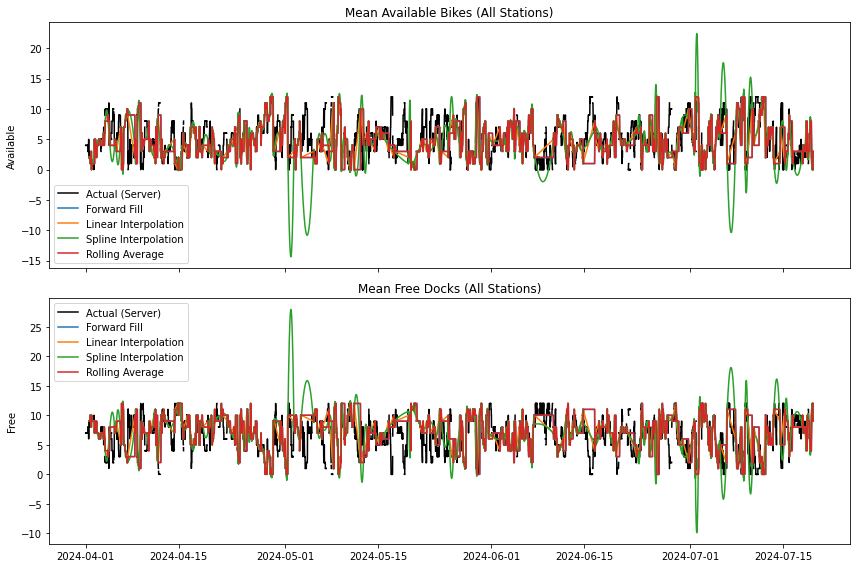

In [2]:
# Step 1: Resample both datasets to 15-minute intervals and compute mean across all stations

# Local data
local_grouped = df_local.resample("15T").mean()

# Server data
server_grouped = df_server.resample("15T").mean()

# Select time window: April to July 2024 (as before)
plot_start = "2024-04-01"
plot_end = "2024-07-31"

local_mean_trimmed = local_grouped[plot_start:plot_end]
server_mean_trimmed = server_grouped[plot_start:plot_end]

# Step 2: Interpolate local dataset
interpolated_means = {
    "Forward Fill": local_mean_trimmed.fillna(method="ffill"),
    "Linear Interpolation": local_mean_trimmed.interpolate(method="linear"),
    "Spline Interpolation": local_mean_trimmed.interpolate(method="spline", order=2),
    "Rolling Average": local_mean_trimmed.fillna(method="ffill").rolling(window=4, min_periods=1).mean()
}

# Reindex all to match server timestamps
for method in interpolated_means:
    interpolated_means[method] = interpolated_means[method].reindex(server_mean_trimmed.index)

# Now we can proceed to plot the first comparison
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot: Available
axs[0].plot(server_mean_trimmed.index, server_mean_trimmed["available"], color='black', label="Actual (Server)")
for method, df_interp in interpolated_means.items():
    axs[0].plot(df_interp.index, df_interp["available"], label=method)
axs[0].set_title("Mean Available Bikes (All Stations)")
axs[0].set_ylabel("Available")
axs[0].legend()

# Plot: Free
axs[1].plot(server_mean_trimmed.index, server_mean_trimmed["free"], color='black', label="Actual (Server)")
for method, df_interp in interpolated_means.items():
    axs[1].plot(df_interp.index, df_interp["free"], label=method)
axs[1].set_title("Mean Free Docks (All Stations)")
axs[1].set_ylabel("Free")
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- Load your datasets ---
df_local = pd.read_csv("./data/data (1).csv")
df_server = pd.read_csv("./data/data.1.csv")

# --- Convert and set datetime index ---
for df in [df_local, df_server]:
    df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")
    df.set_index("datetime", inplace=True)
    df.sort_index(inplace=True)

# --- Keep only relevant columns ---
df_local = df_local[["available", "free"]]
df_server = df_server[["available", "free"]]

# --- Resample to 15-minute intervals and compute mean across all stations ---
local_mean = df_local.resample("15T").mean()
server_mean = df_server.resample("15T").mean()

# --- Filter the time range: April to July 2024 ---
plot_start = "2024-04-01"
plot_end = "2024-07-31"
local_mean = local_mean[plot_start:plot_end]
server_mean = server_mean[plot_start:plot_end]

# --- Interpolation methods ---
interpolated_means = {
    "Forward Fill": local_mean.fillna(method="ffill"),
    "Linear Interpolation": local_mean.interpolate(method="linear"),
    "Spline Interpolation": local_mean.interpolate(method="spline", order=2),
    "Rolling Average": local_mean.fillna(method="ffill").rolling(window=4, min_periods=1).mean()
}

# Align all to server's index
for method in interpolated_means:
    interpolated_means[method] = interpolated_means[method].reindex(server_mean.index)

#Create Plotly interactive plot
fig = go.Figure()

# Server actual values
fig.add_trace(go.Scatter(x=server_mean.index, y=server_mean["available"], mode='lines',
                         name="Server - Available", line=dict(color="black")))
fig.add_trace(go.Scatter(x=server_mean.index, y=server_mean["free"], mode='lines',
                         name="Server - Free", line=dict(color="black", dash="dot")))

# Add interpolated values
for method, df_interp in interpolated_means.items():
    fig.add_trace(go.Scatter(x=df_interp.index, y=df_interp["available"], mode='lines',
                             name=f"{method} - Available"))
    fig.add_trace(go.Scatter(x=df_interp.index, y=df_interp["free"], mode='lines',
                             name=f"{method} - Free", line=dict(dash="dot")))

# Final layout tweaks
fig.update_layout(
    title="Mean Available Bikes and Free Docks (All Stations)",
    xaxis_title="Time",
    yaxis_title="Mean Count",
    xaxis_rangeslider_visible=True,
    hovermode="x unified",
    height=1000
)

fig.show()


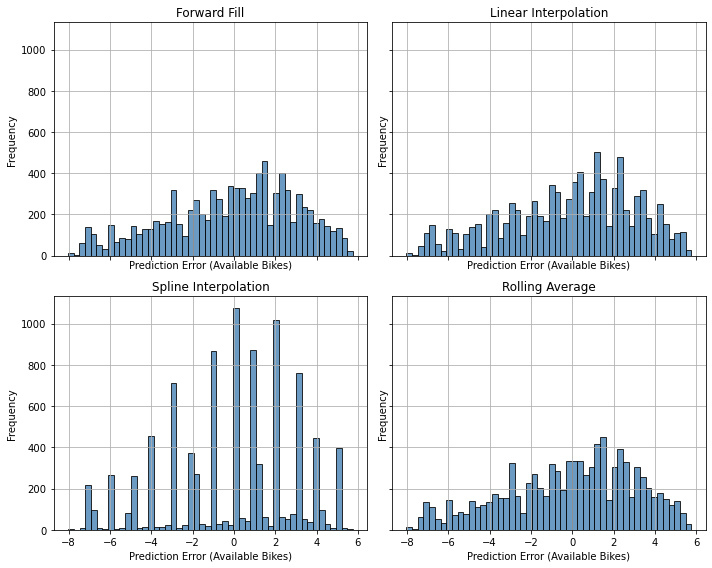

In [4]:
import matplotlib.pyplot as plt

# Compute errors between each method and the server dataset (available only)
errors = {}
for method, df_interp in interpolated_means.items():
    # Join on same index
    comparison = pd.concat([server_mean_trimmed["available"], df_interp["available"]], axis=1, keys=["server", "local"])
    comparison = comparison.dropna()
    if not comparison.empty:
        errors[method] = (comparison["local"] - comparison["server"]).values

# Plot error histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axs = axs.flatten()

for i, (method, err_vals) in enumerate(errors.items()):
    axs[i].hist(err_vals, bins=50, alpha=0.8, color="steelblue", edgecolor="black")
    axs[i].set_title(f"{method}")
    axs[i].set_xlabel("Prediction Error (Available Bikes)")
    axs[i].set_ylabel("Frequency")
    axs[i].grid(True)

plt.tight_layout()
plt.show()
